# Metropolitan Police Department of the District of Columbia

The Metropolitan Police Department of the District of Columbia witnessed a lot of crime scenes that happened in the year 2018. It was tough to track all the crime scenes by the Police Department and Henceforth they demanded Data Sceintist to help them in tracking the crimes and come up with a solution to allot Police Special at different precinct area.

## Solution Concept :

DATA SCIENTISTS decided to use K-means cluster and plot a graph so as to group crimes in different precinct area on the basis of Crime happening during MIDNIGHT, DAY and EVENING.

### DATA SOURCE :

Data Source Link : http://opendata.dc.gov/datasets/38ba41dd74354563bce28a359b59324e_0

### CODES:

In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('Crime_Incidents_in_2018.csv')
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.972215,38.852618,7006630,2018-07-26T00:00:00.000Z,MIDNIGHT,GUN,HOMICIDE,3100 3198 BLOCK OF 24TH STREET SE,402412.0,131645.0,...,007408 1,7408.0,Precinct 115,38.852610,-76.972212,NaN,2007-01-14T23:30:00.000Z,2007-01-14T00:00:00.000Z,233238668,07006630-01
1,-77.036529,38.911503,18109965,2018-07-05T15:46:38.000Z,EVENING,OTHERS,THEFT F/AUTO,1600 - 1619 BLOCK OF 16TH STREET NW,396832.0,138182.0,...,005301 4,5301.0,Precinct 15,38.911495,-77.036527,NaN,2018-07-04T09:30:47.000Z,2018-07-05T15:00:48.000Z,233234586,18109965-01
2,-77.015015,38.914742,18109966,2018-07-07T18:44:52.000Z,EVENING,OTHERS,THEFT/OTHER,200 - 299 BLOCK OF RHODE ISLAND AVENUE NW,398698.0,138541.0,...,003400 2,3400.0,Precinct 20,38.914734,-77.015013,NaN,2018-07-05T15:20:38.000Z,2018-07-05T16:53:13.000Z,233234587,18109966-01
3,-77.000579,38.921832,18109969,2018-07-05T16:01:07.000Z,EVENING,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF 4TH STREET NE,399950.0,139328.0,...,009203 2,9203.0,Precinct 74,38.921824,-77.000577,NaN,2018-07-05T14:11:43.000Z,NaN,233234588,18109969-01
4,-77.010599,38.916265,18109970,2018-07-05T15:59:28.000Z,EVENING,OTHERS,THEFT F/AUTO,1 - 99 BLOCK OF RHODE ISLAND AVENUE NW,399081.0,138710.0,...,003302 1,3302.0,Precinct 19,38.916257,-77.010597,NaN,2018-07-04T21:00:53.000Z,2018-07-05T05:10:11.000Z,233234589,18109970-01


#### Cutting and sorting out table to a well sorted and using only usable columns :

In [57]:
df = df[['X','Y','SHIFT','METHOD','OFFENSE','BLOCK','VOTING_PRECINCT']]
df.head()

,X,Y,SHIFT,METHOD,OFFENSE,BLOCK,VOTING_PRECINCT
0,-76.972215,38.852618,MIDNIGHT,GUN,HOMICIDE,3100 3198 BLOCK OF 24TH STREET SE,Precinct 115
1,-77.036529,38.911503,EVENING,OTHERS,THEFT F/AUTO,1600 - 1619 BLOCK OF 16TH STREET NW,Precinct 15
2,-77.015015,38.914742,EVENING,OTHERS,THEFT/OTHER,200 - 299 BLOCK OF RHODE ISLAND AVENUE NW,Precinct 20
3,-77.000579,38.921832,EVENING,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF 4TH STREET NE,Precinct 74
4,-77.010599,38.916265,EVENING,OTHERS,THEFT F/AUTO,1 - 99 BLOCK OF RHODE ISLAND AVENUE NW,Precinct 19


#### Removing the word PRECINCT FROM VOTING_PRECINCT :

In [58]:
df['VOTING_PRECINCT'] = df['VOTING_PRECINCT'].map(lambda x: str(x)[9:])

In [59]:
df['VOTING_PRECINCT'] = df['VOTING_PRECINCT'].map(lambda x: int(x))
df.head()

,X,Y,SHIFT,METHOD,OFFENSE,BLOCK,VOTING_PRECINCT
0,-76.972215,38.852618,MIDNIGHT,GUN,HOMICIDE,3100 3198 BLOCK OF 24TH STREET SE,115
1,-77.036529,38.911503,EVENING,OTHERS,THEFT F/AUTO,1600 - 1619 BLOCK OF 16TH STREET NW,15
2,-77.015015,38.914742,EVENING,OTHERS,THEFT/OTHER,200 - 299 BLOCK OF RHODE ISLAND AVENUE NW,20
3,-77.000579,38.921832,EVENING,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF 4TH STREET NE,74
4,-77.010599,38.916265,EVENING,OTHERS,THEFT F/AUTO,1 - 99 BLOCK OF RHODE ISLAND AVENUE NW,19


### CHANGE THE VALUE OF MIDNIGHT TO 0 , DAY TO 1 AND EVENING TO 2 :

In [74]:
counter = 0
lists = [0]*len(df)

for _ in df.SHIFT:
    if _ == "MIDNIGHT":
        lists[counter] = int(0)

    elif _ == "DAY":
        lists[counter] = int(1)

    else:
        lists[counter] = int(2)

    counter = counter + 1


In [76]:
df['SHIFT-VAR'] = lists

In [78]:
x1 = df['VOTING_PRECINCT']
x2 = df['SHIFT-VAR']

In [82]:
from sklearn.cluster import KMeans 
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [83]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [86]:
import matplotlib.pyplot as plt # plotting library

def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


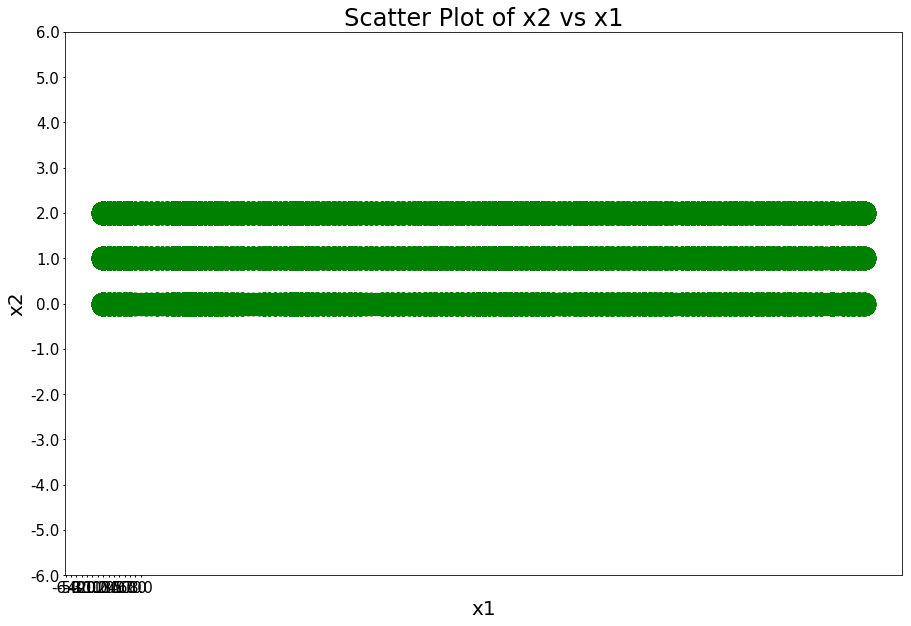

In [87]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

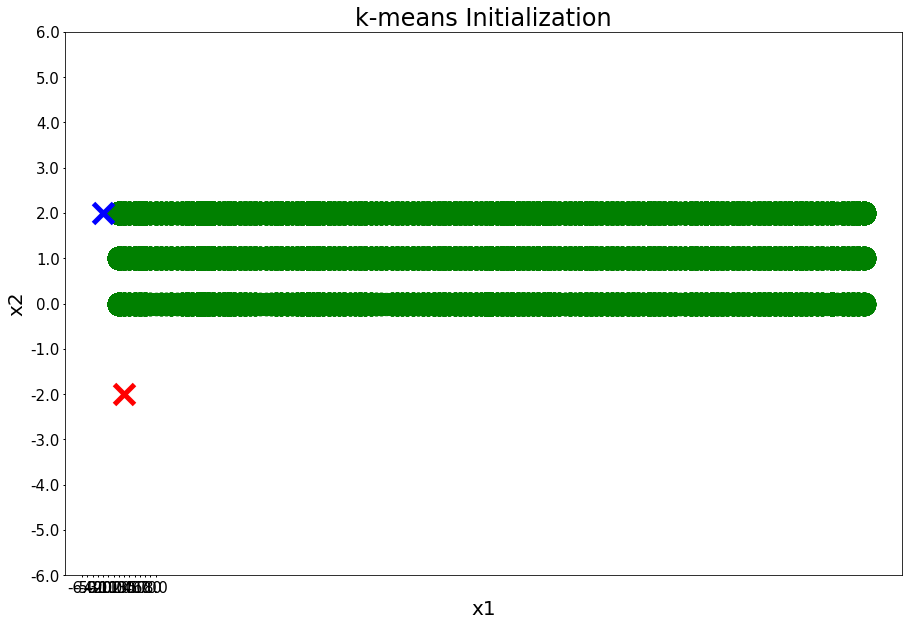

In [88]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


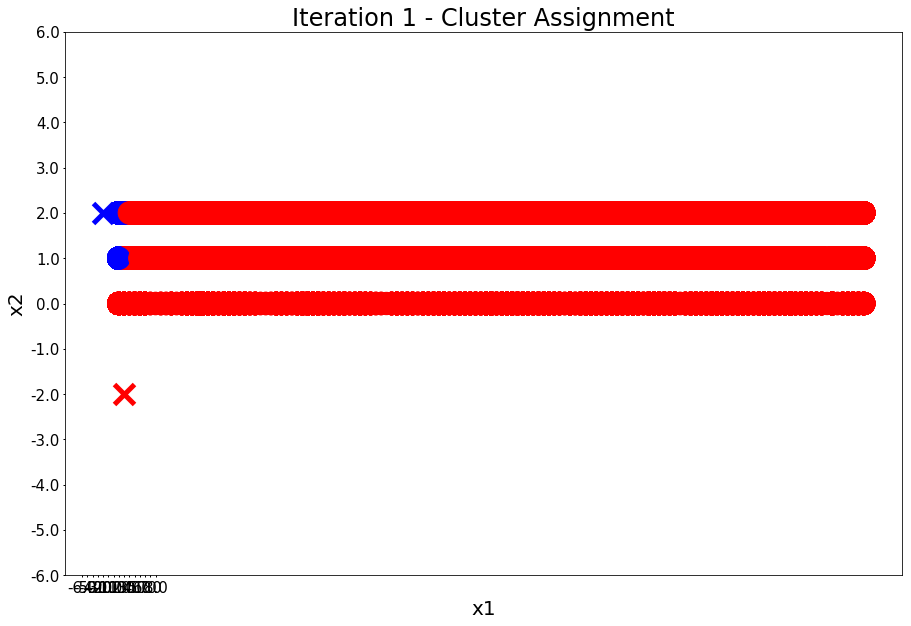

Iteration 1 - Press Enter to update the centers


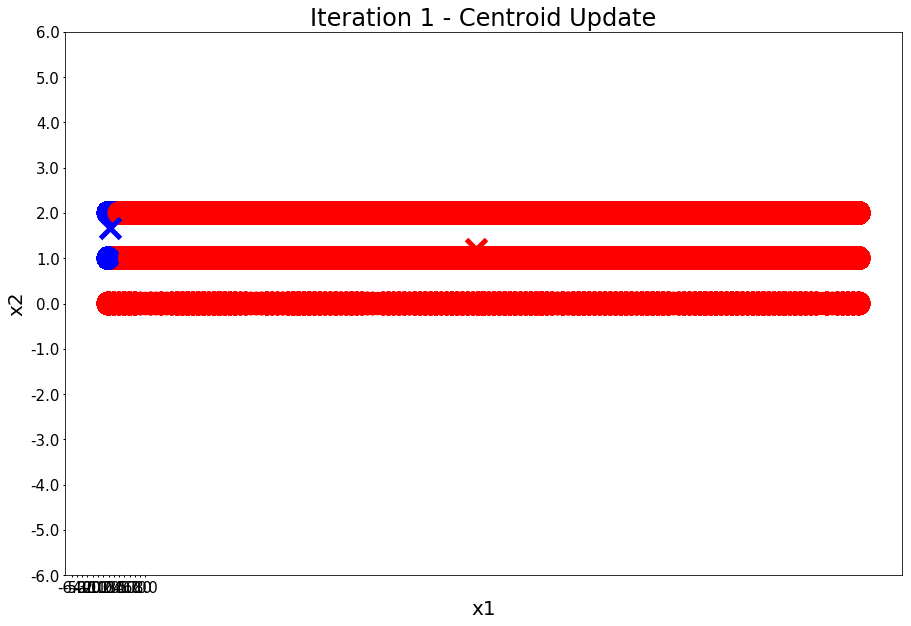

Iteration 2 - Press Enter to update the members of each cluster


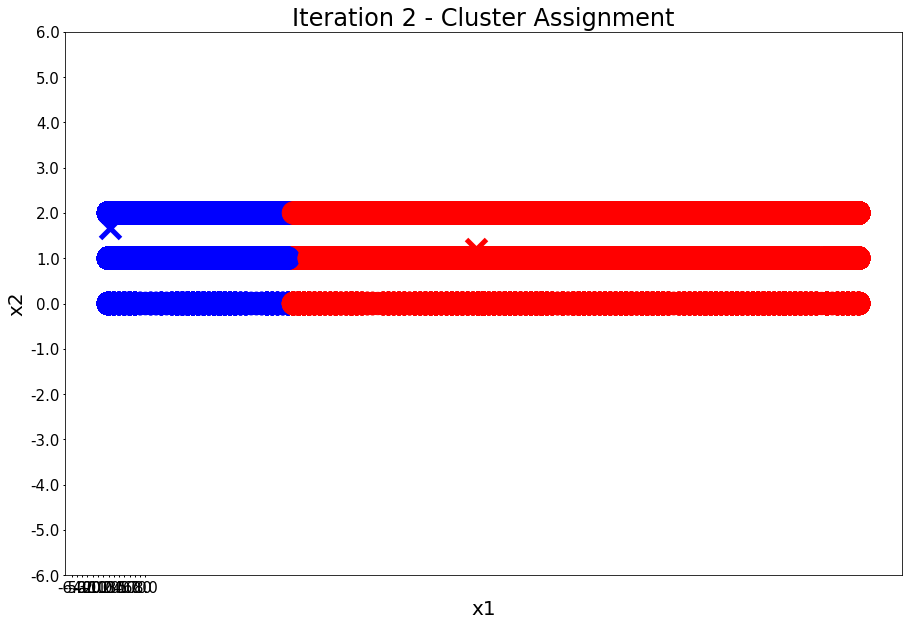

Iteration 2 - Press Enter to update the centers


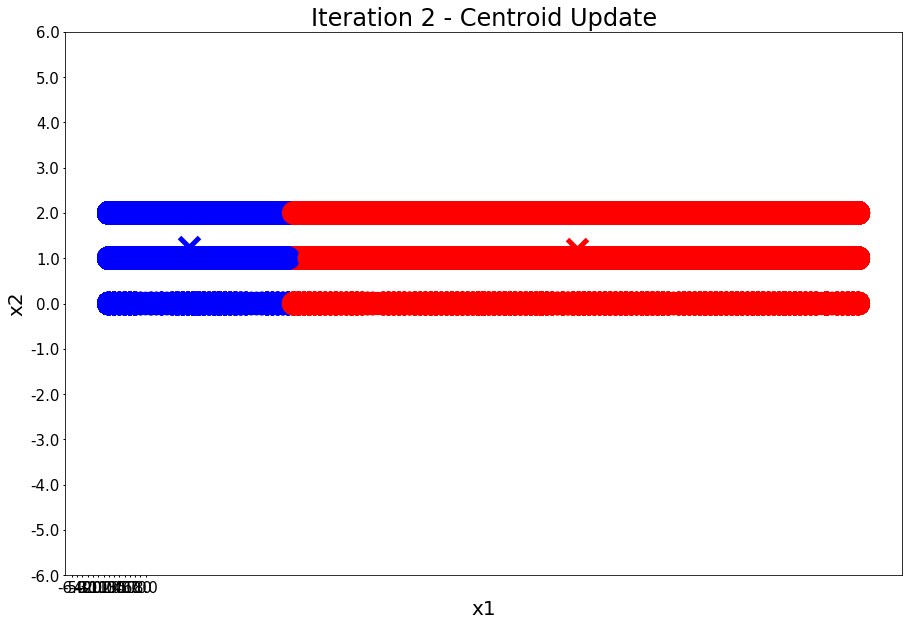

Iteration 3 - Press Enter to update the members of each cluster


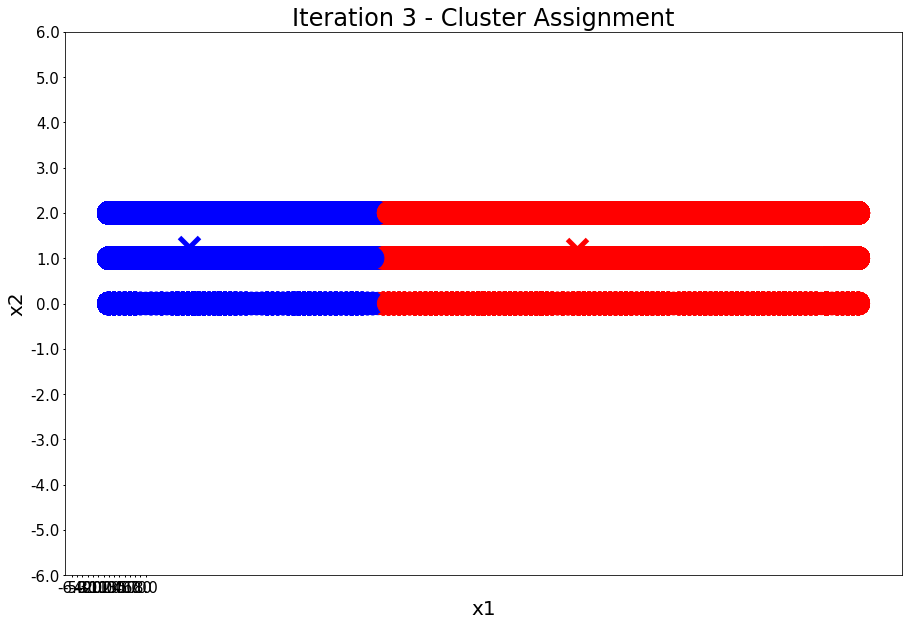

Iteration 3 - Press Enter to update the centers


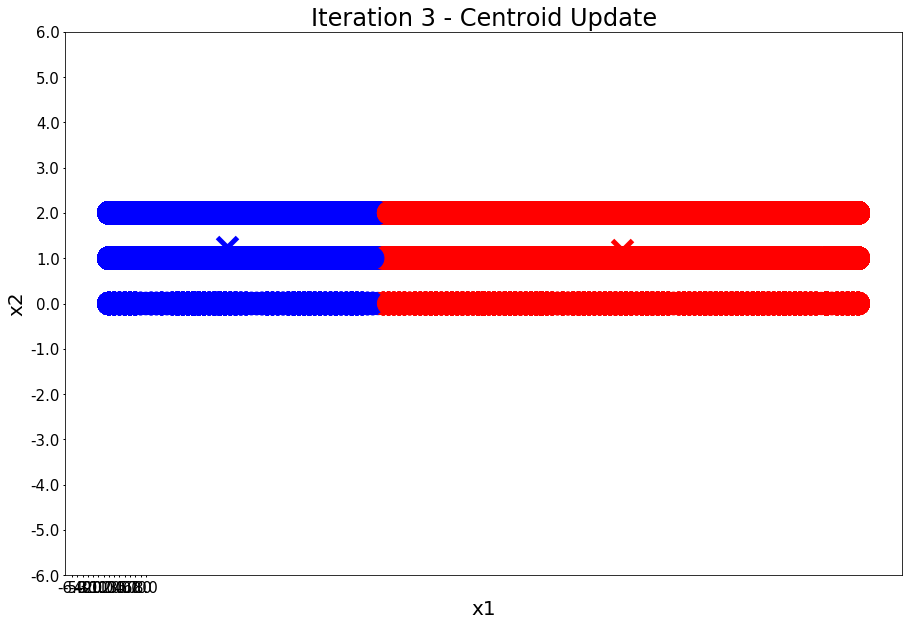

Iteration 4 - Press Enter to update the members of each cluster


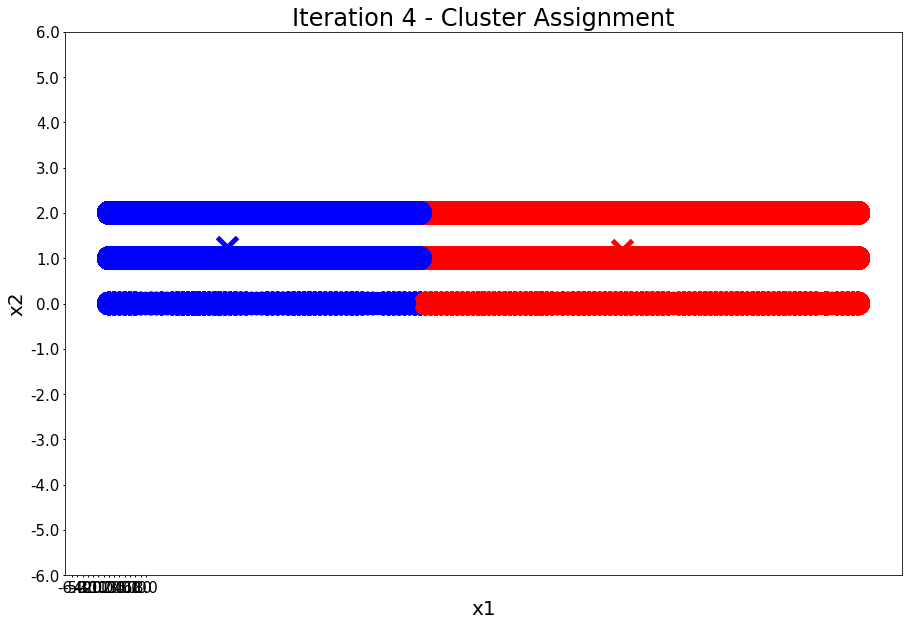

Iteration 4 - Press Enter to update the centers


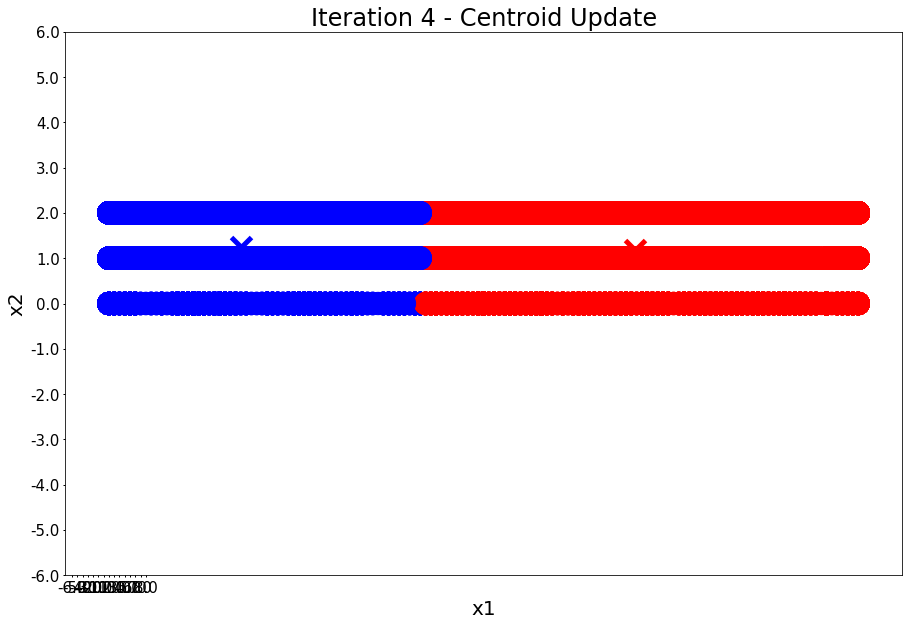

In [89]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)